In [2]:
!pip install pandas 
!pip install seaborn
!pip install matplotlib
!pip install numpy

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
data = pd.read_csv('students.csv')

In [7]:
data.head(4)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [20]:
data.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [22]:
data.shape

(30641, 15)

In [24]:
data.isnull().any()

Unnamed: 0             False
Gender                 False
EthnicGroup             True
ParentEduc              True
LunchType              False
TestPrep                True
ParentMaritalStatus     True
PracticeSport           True
IsFirstChild            True
NrSiblings              True
TransportMeans          True
WklyStudyHours          True
MathScore              False
ReadingScore           False
WritingScore           False
dtype: bool

In [30]:
data.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [32]:
data = data.drop('Unnamed: 0' , axis = 1)
data

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [36]:
categorical_cols = ['EthnicGroup', 'ParentEduc', 'TestPrep', 'TransportMeans']
data[categorical_cols] = data[categorical_cols].fillna('Unknown')

In [38]:
data['NrSiblings'] = data['NrSiblings'].fillna(data['NrSiblings'].median())

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          30641 non-null  object 
 2   ParentEduc           30641 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             30641 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           30641 non-null  float64
 9   TransportMeans       30641 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [42]:
data['NrSiblings']

0        3.0
1        0.0
2        4.0
3        1.0
4        0.0
        ... 
30636    2.0
30637    1.0
30638    1.0
30639    3.0
30640    1.0
Name: NrSiblings, Length: 30641, dtype: float64

In [46]:
data['NrSiblings'] = data['NrSiblings'].astype(int)

In [227]:
data['WklyStudyHours'] = data['WklyStudyHours'].replace({'< 5': 0, '5 - 10': 1, '> 10':'3'}).astype(int)

In [194]:
data.head(10)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,Unknown,bachelor's degree,standard,none,married,regularly,yes,3,school_bus,0,71,71,74
1,female,group C,some college,standard,Unknown,married,sometimes,yes,0,Unknown,1,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4,school_bus,0,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1,Unknown,1,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0,school_bus,1,76,78,75
5,female,group B,associate's degree,standard,none,married,regularly,yes,1,school_bus,1,73,84,79
6,female,group B,some college,standard,completed,widowed,never,no,1,private,1,85,93,89
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1,private,> 10,41,43,39
8,male,group D,high school,free/reduced,completed,single,sometimes,no,3,private,> 10,65,64,68
9,female,group B,high school,free/reduced,none,married,regularly,yes,2,private,0,37,59,50


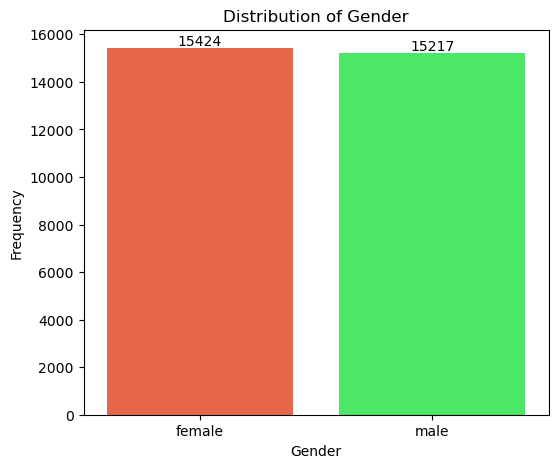

In [271]:
plt.figure(figsize=(6, 5))
a = sns.countplot(data=data, x='Gender', hue='Gender', palette=['#FF5733', '#33FF57'], legend=False)
for container in a.containers:
    a.bar_label(container)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

In [89]:
data.ParentEduc.unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school', 'Unknown'],
      dtype=object)

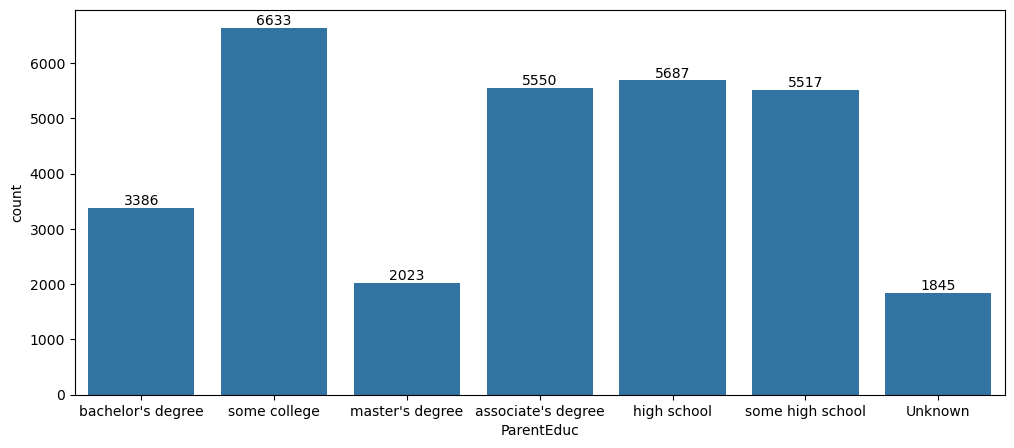

In [275]:
plt.figure(figsize = (12,5))
a = sns.countplot(data=data,x='ParentEduc')
a.bar_label(a.containers[0])
plt.show()

In [172]:
data['TestPrep'].value_counts()

TestPrep
none         18856
completed     9955
Unknown       1830
Name: count, dtype: int64

In [174]:
df = data.groupby('TestPrep').agg({"MathScore":"mean" , "ReadingScore":"mean" , "WritingScore":"mean"})
print(df)

           MathScore  ReadingScore  WritingScore
TestPrep                                        
Unknown    66.887978     69.655738     68.500000
completed  69.546660     73.732998     74.703265
none       64.948770     67.051071     65.092756


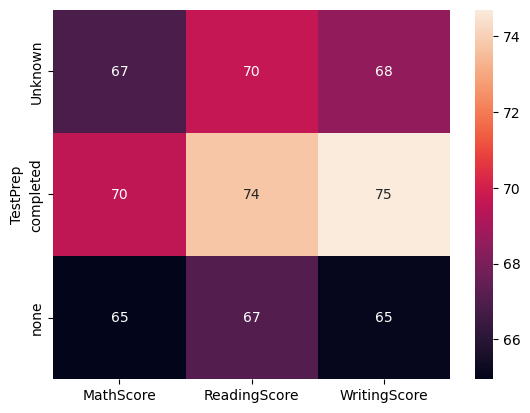

In [178]:
sns.heatmap(df,annot = True)
plt.show()

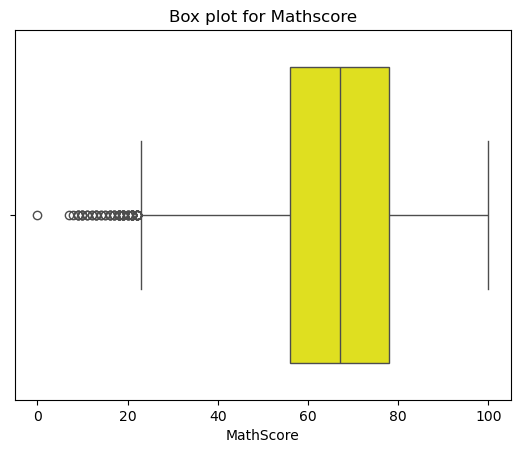

In [291]:
sns.boxplot(data=data , x='MathScore' , color = 'yellow')
plt.title("Box plot for Mathscore")
plt.show()

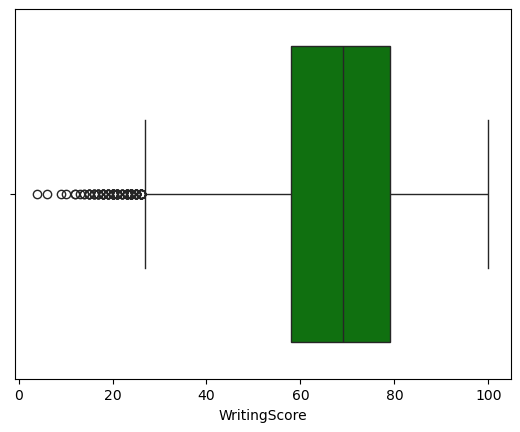

In [241]:
sns.boxplot(data=data , x='WritingScore' , color = 'green')
plt.title("Box plot for Writingscore")
plt.show()

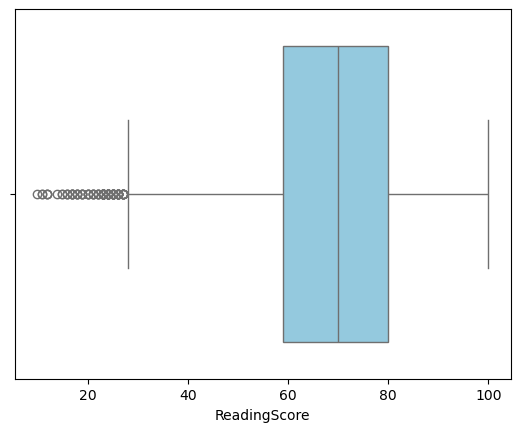

In [243]:
sns.boxplot(data=data , x='ReadingScore' , color = 'skyblue')
plt.title("Box plot for Readingscore")
plt.show()

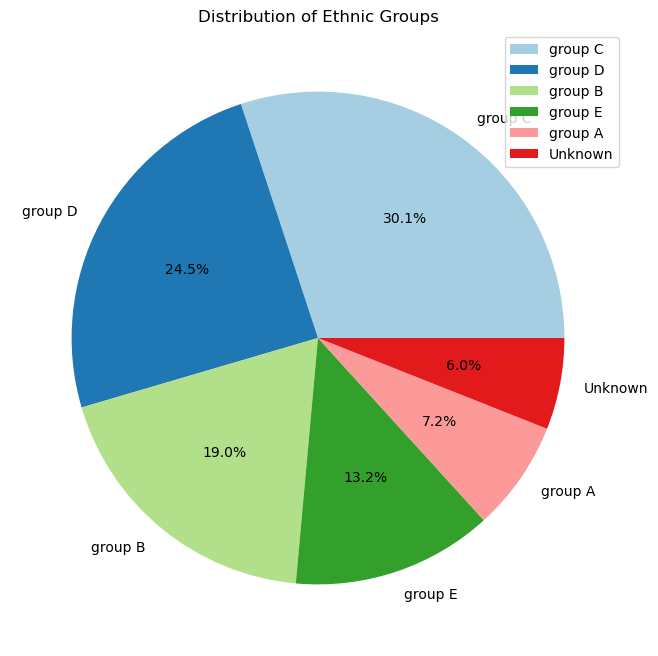

In [261]:
df = data['EthnicGroup'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(df, labels=ethnic_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Distribution of Ethnic Groups')
plt.legend()
plt.show()


In [265]:
df1 = data.groupby('ParentEduc').agg({"MathScore":"mean" , "ReadingScore":"mean" , "WritingScore":"mean"})
print(df)

EthnicGroup
group C    9212
group D    7503
group B    5826
group E    4041
group A    2219
Unknown    1840
Name: count, dtype: int64


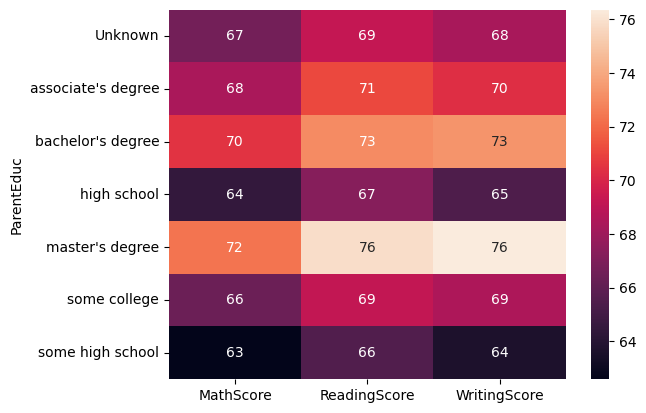

In [267]:
sns.heatmap(df1,annot = True)
plt.show()

In [283]:
data.groupby('TestPrep')['ParentEduc'].value_counts()

TestPrep   ParentEduc        
Unknown    some college           417
           high school            346
           associate's degree     337
           some high school       325
           bachelor's degree      177
           master's degree        120
           Unknown                108
completed  some college          2200
           some high school      1814
           high school           1803
           associate's degree    1797
           bachelor's degree     1116
           master's degree        644
           Unknown                581
none       some college          4016
           high school           3538
           associate's degree    3416
           some high school      3378
           bachelor's degree     2093
           master's degree       1259
           Unknown               1156
Name: count, dtype: int64

In [285]:
data.groupby(['TestPrep', 'ParentEduc']).agg(
    count=('ParentEduc', 'count'),  
    avg_math=('MathScore', 'mean'),  
    avg_reading=('ReadingScore', 'mean'),  
    avg_writing=('WritingScore', 'mean')
).reset_index()


,TestPrep,ParentEduc,count,avg_math,avg_reading,avg_writing
0,Unknown,Unknown,108,64.907407,68.250000,67.407407
1,Unknown,associate's degree,337,69.166172,72.332344,71.281899
2,Unknown,bachelor's degree,177,71.039548,73.881356,73.960452
3,Unknown,high school,346,65.679191,67.841040,65.687861
4,Unknown,master's degree,120,74.025000,76.841667,77.358333
5,Unknown,some college,417,65.935252,68.712230,67.769784
6,Unknown,some high school,325,62.796923,65.535385,63.664615
7,completed,Unknown,581,68.974182,73.468158,74.251291
8,completed,associate's degree,1797,71.027268,75.279354,76.247078
9,completed,bachelor's degree,1116,74.021505,78.050179,80.271505


In [24]:
z = data.groupby('LunchType').agg({"MathScore":"mean" , "ReadingScore":"mean" , "WritingScore":"mean"})

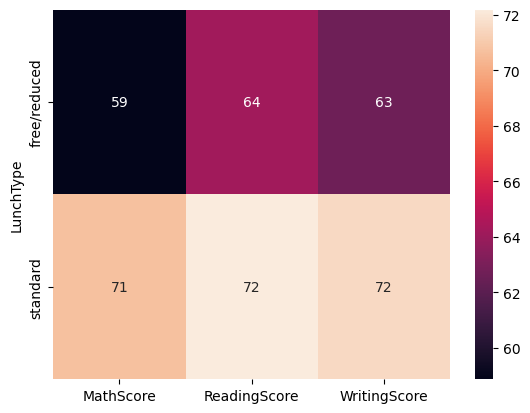

In [28]:
sns.heatmap(z, annot=True)
plt.show()

In [30]:
data.head(1)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74


In [38]:
data['NrSiblings'] = data['NrSiblings'].fillna(0).astype(int)


In [92]:
b = data.groupby('NrSiblings').agg({"MathScore":"mean" , "ReadingScore":"mean" , "WritingScore":"mean"})

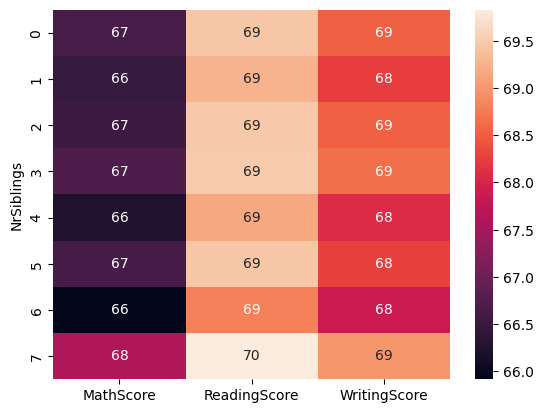

In [94]:
sns.heatmap(b , annot = True)
plt.show()

In [88]:
v = data.groupby('IsFirstChild').agg({"MathScore":"mean" , "ReadingScore":"mean" , "WritingScore":"mean"})

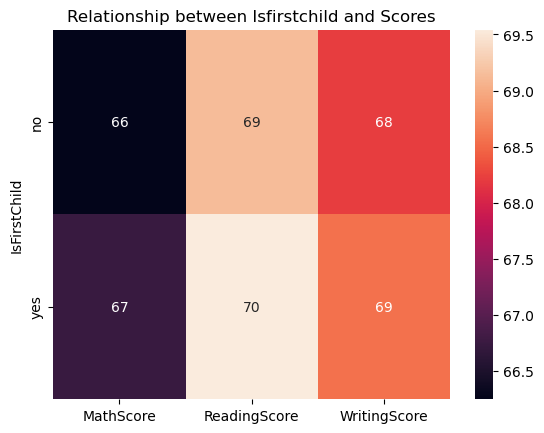

In [90]:
sns.heatmap(v, annot = True)
plt.title("Relationship between Isfirstchild and Scores")
plt.show()

In [ ]:
# The number of female students is higher than male students in the dataset.
# Students whose parents have a master’s degree tend to score higher, while those whose parents only completed high school tend to score lower.
# Math scores are generally lower compared to reading and writing scores.
# Students who completed test preparation tend to score higher.
# The number of siblings does not have a significant impact on student performance.
# Students who have a standard lunch tend to perform better than those with a free/reduced lunch plan.
